In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [42]:
data = pd.read_csv("WHO-COVID-19-global-daily-data.csv")
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
447355,2025-02-09,TJ,Tajikistan,EUR,NaN,17786,NaN,125
447356,2025-02-09,SY,Syrian Arab Republic,EMR,NaN,57423,NaN,3163
447357,2025-02-09,LK,Sri Lanka,SEAR,NaN,672812,NaN,16907
447358,2025-02-09,SN,Senegal,AFR,NaN,89321,NaN,1972


In [43]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447360 entries, 0 to 447359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      447360 non-null  object 
 1   Country_code       445496 non-null  object 
 2   Country            447360 non-null  object 
 3   WHO_region         447360 non-null  object 
 4   New_cases          208549 non-null  float64
 5   Cumulative_cases   447360 non-null  int64  
 6   New_deaths         209492 non-null  float64
 7   Cumulative_deaths  447360 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 27.3+ MB
None


In [44]:
# Summary statistics
print(data.describe(include='all'))

       Date_reported Country_code   Country WHO_region     New_cases  \
count         447360       445496    447360     447360  2.085490e+05   
unique          1864          239       240          7           NaN   
top       2025-02-09           AI  Anguilla        EUR           NaN   
freq             240         1864      1864     115568           NaN   
mean             NaN          NaN       NaN        NaN  3.727591e+03   
std              NaN          NaN       NaN        NaN  4.877001e+04   
min              NaN          NaN       NaN        NaN -6.507900e+04   
25%              NaN          NaN       NaN        NaN  3.000000e+00   
50%              NaN          NaN       NaN        NaN  6.100000e+01   
75%              NaN          NaN       NaN        NaN  6.860000e+02   
max              NaN          NaN       NaN        NaN  6.966046e+06   

        Cumulative_cases     New_deaths  Cumulative_deaths  
count       4.473600e+05  209492.000000       4.473600e+05  
unique       

In [45]:
# Count missing values in each column
print(data.isnull().sum())

Date_reported             0
Country_code           1864
Country                   0
WHO_region                0
New_cases            238811
Cumulative_cases          0
New_deaths           237868
Cumulative_deaths         0
dtype: int64


In [46]:
# Drop rows where Country_code is missing
data = data.dropna(subset=["Country_code"])

In [47]:

# Fill missing values for New_cases and New_deaths with 0
data = data.copy()  # Ensure it's a copy before modification
data["New_cases"] = data["New_cases"].fillna(0)
data["New_deaths"] = data["New_deaths"].fillna(0)


In [48]:
# Verify that missing values are handled
print(data.isnull().sum())

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


In [49]:
# Check for duplicates
print("Duplicate rows:", data.duplicated().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)


Duplicate rows: 0


In [50]:
# Convert date column to datetime format
data["Date_reported"] = pd.to_datetime(data["Date_reported"])

# Convert numerical columns to appropriate types
data["New_cases"] = pd.to_numeric(data["New_cases"], errors='coerce')
data["New_deaths"] = pd.to_numeric(data["New_deaths"], errors='coerce')


#### removing outliers

In [51]:
##using numpy that i imported earlier

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower limit
    upper_bound = Q3 + 1.5 * IQR  # Upper limit
    
    # Filter data within the IQR range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers
data = remove_outliers(data, "New_cases")
data = remove_outliers(data, "New_deaths")

# Verify if extreme values are removed
print(data[["New_cases", "New_deaths"]].describe())


           New_cases  New_deaths
count  333404.000000    333404.0
mean        3.797915         0.0
std        13.399301         0.0
min       -62.000000         0.0
25%         0.000000         0.0
50%         0.000000         0.0
75%         0.000000         0.0
max       107.000000         0.0


 ### Exploratory Visualizations

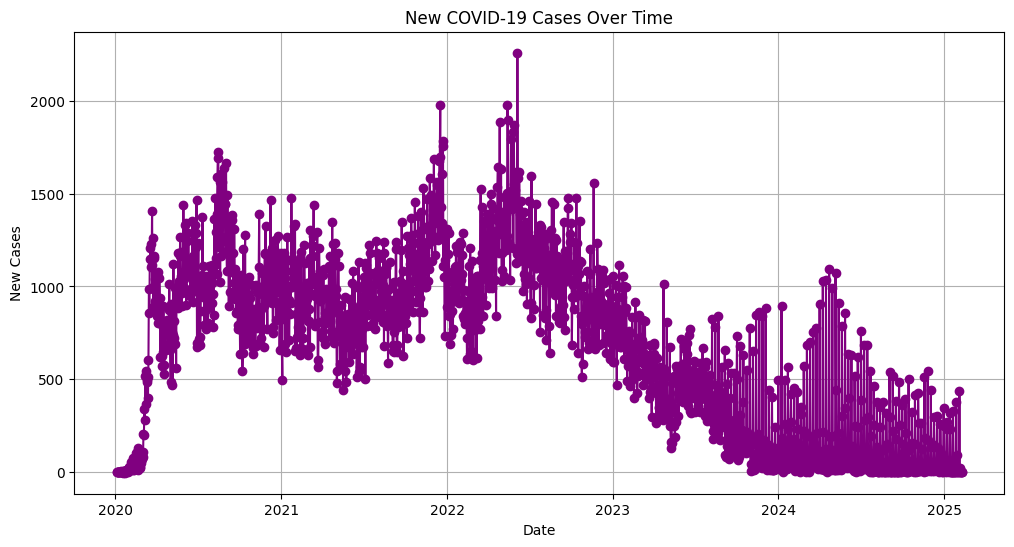

In [52]:
import matplotlib.pyplot as plt

# Group data by date and sum new cases
cases_over_time = data.groupby("Date_reported")["New_cases"].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(cases_over_time, color="purple", marker="o")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("New COVID-19 Cases Over Time")
plt.grid()
plt.show()


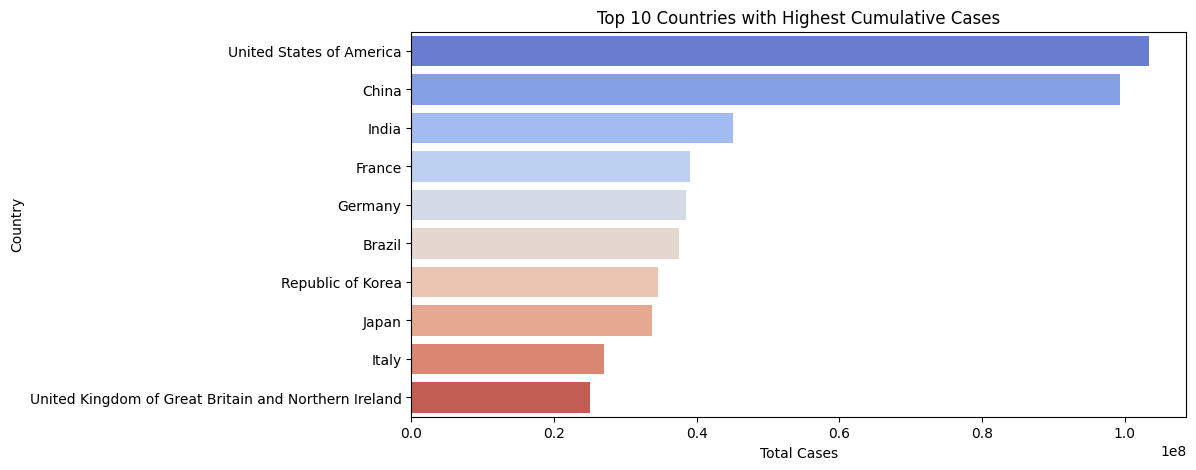

In [53]:
#using seaborn which i imported earlier
# Group by country and sum cases
top_countries = data.groupby("Country")["Cumulative_cases"].max().nlargest(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, 
            palette="coolwarm", legend=False)  # Adding hue to prevent warning
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Cumulative Cases")
plt.show()


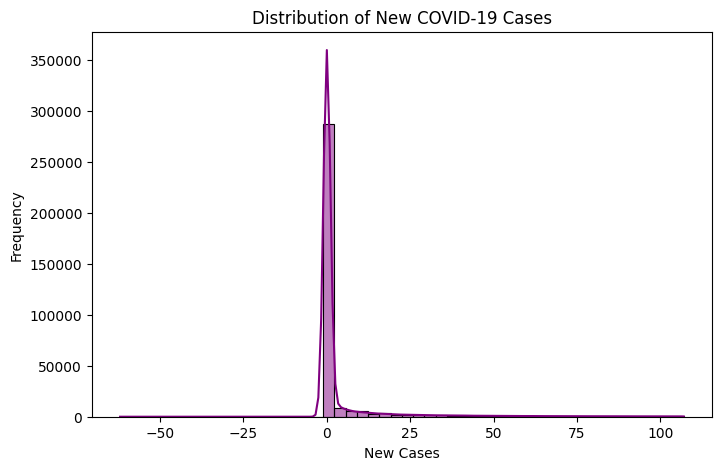

In [54]:
#distribution of new case
plt.figure(figsize=(8, 5))
sns.histplot(data["New_cases"].dropna(), bins=50, kde=True, color="purple")
plt.xlabel("New Cases")
plt.ylabel("Frequency")
plt.title("Distribution of New COVID-19 Cases")
plt.show()


Country-Specific Analysis

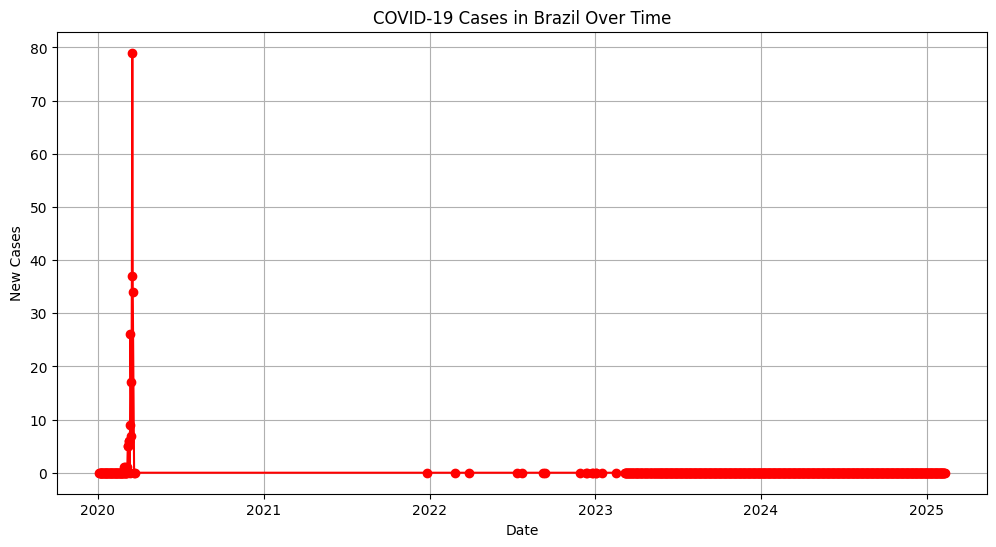

In [55]:
# Filter data for Brazil
brazil_data = data[data["Country"] == "Brazil"]

# Plot new cases over time for Brazil
plt.figure(figsize=(12, 6))
plt.plot(brazil_data["Date_reported"], brazil_data["New_cases"], color="red", marker="o")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("COVID-19 Cases in Brazil Over Time")
plt.grid()
plt.show()


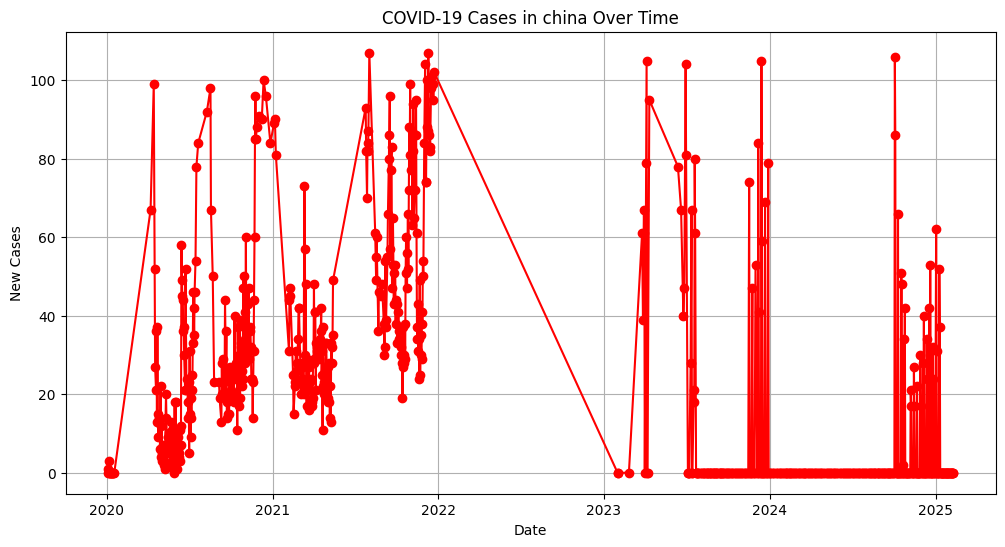

In [56]:
# Filter data for china
china_data = data[data["Country"] == "China"]

# Plot new cases over time for china
plt.figure(figsize=(12, 6))
plt.plot(china_data["Date_reported"], china_data["New_cases"], color="red", marker="o")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("COVID-19 Cases in china Over Time")
plt.grid()
plt.show()


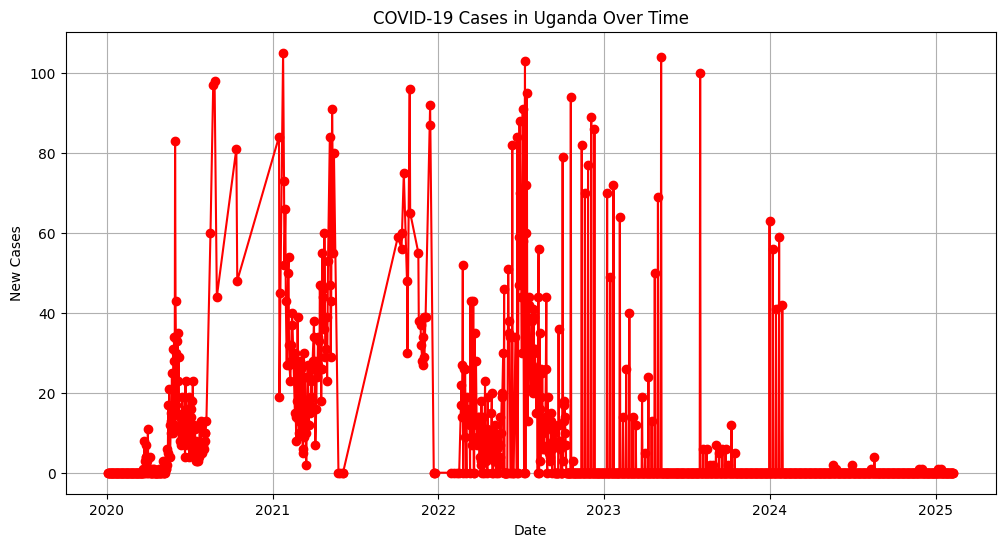

In [57]:
# Filter data for Uganda
uganda_data = data[data["Country"] == "Uganda"]

# Plot new cases over time for Uganda
plt.figure(figsize=(12, 6))
plt.plot(uganda_data["Date_reported"], uganda_data["New_cases"], color="red", marker="o")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("COVID-19 Cases in Uganda Over Time")
plt.grid()
plt.show()


 ### Correlation Analysis

            New_cases  New_deaths
New_cases         1.0         NaN
New_deaths        NaN         NaN


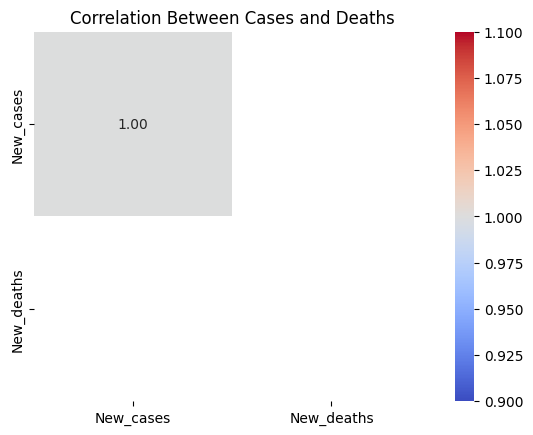

In [58]:

# Compute correlation
correlation = data[["New_cases", "New_deaths"]].corr()
print(correlation)

# Heatmap for better visualization
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Cases and Deaths")
plt.show()


 #### Save Cleaned Data for Further Use

In [59]:
data.to_csv("cleaned_covid_data.csv", index=False)
